In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Solow model class definition

In [2]:
class Solow:
    """
    - class that bundles several functions of use when analysing Solow growth model
    - most calculations assume the model to be in per effective labor terms
    - class assumes labor augmenting Cobb-Douglas production function
    """
    
    def __init__(self, α=0.36, γ=0.02, η=0.01, δ=0.08, s=0.25):
        self.α, self.γ, self.η, self.δ, self.s = α, γ, η, δ, s
        self.D = γ+η+δ+γ*η
        
    def prod_ftion(self, k):
        α = self.α
        return k**α
    
    def savings(self, k):
        s = self.s
        return s*self.prod_ftion(k)
    
    def deprec(self, k):
        D=self.D
        return D*k
    
    def LMC(self, k):
        α, γ, η, δ, s = self.α, self.γ, self.η, self.δ, self.s
        return ((1-δ)*k+self.savings(k))/((1+γ)*(1+η))
    
    def steady_state_capital(self):
        α, s = self.α, self.s
        D=self.D
        return (s/D)**(1/(1-α))
    
    def steady_state_output(self):
        α = self.α
        return (self.steady_state_capital())**α
    
    def y_to_k(self, k):
        return self.savings(k)/k
    
    def capital_growth(self, k):
        α, γ, η, δ, s = self.α, self.γ, self.η, self.δ, self.s
        D=self.D
        return k*((-D+s*k**(α-1))/((1-γ)*(1-η)))
    
    def percent_capital_growth(self, k):
        α, γ, η, δ, s = self.α, self.γ, self.η, self.δ, self.s
        D=self.D
        return (-D+s*k**(α-1))/((1-γ)*(1-η))
    
    def consumption(self, s):
        self.s=s
        ss = self.steady_state()
        return (1-s)*self.prod_ftion(ss)
    
    def k_golden_rule(self):
        α, D = self.α, self.D
        return (α/D)**(1/(1-α))
    
    def kt_to_k_star(self, k):
        return k/self.steady_state_capital()
    
    def generate_capital_path(self, k0, T):
        path = np.empty(T)
        path[0]=k0
        
        for t in range(1,T):
            path[t] = self.LMC(path[t-1])
            
        return path
    
    def output_per_capita(self, t):
        y_star = self.steady_state_output()
        η=self.η
        return y_star*(1+η)**t

# 1) steady state level of capital and output formulas

## $ k^* = \Big(\frac{s}{\gamma+\eta+\delta+\gamma \eta} \Big)^{\frac{1}{1-\alpha}} $

## $ y^* = \Big(\frac{s}{\gamma+\eta+\delta+\gamma \eta} \Big)^{\frac{\alpha}{1-\alpha}} $

# 2, 3) steady state level of capital and output computed

In [11]:
# arbitrary function created so that there's no need to copy the code for subproblem 4)
def compute_and_plot_solow(solow):
    
    k_star = solow.steady_state_capital()
    y_star = solow.steady_state_output()

    print(f"steady state capital value: k* = {k_star:.4}")
    print(f"steady state output value: y* = {y_star:.4}")

    T=101
    capital_path=np.empty(T)

    k0=k_star*0.8
    y0=solow.prod_ftion(k0)

    capital_path[0]=k0

    capital_path = solow.generate_capital_path(k0, T)

    output_path = solow.prod_ftion(capital_path)

    break_t = len(output_path[output_path<=0.95*(y_star)])
    # break_t = len(output_path[output_path<=y0+(y_star-y0)*0.95])
    y_break = output_path[break_t]

    fix, ax = plt.subplots(figsize=(9,6))

    ax.plot(range(break_t+1), output_path[:break_t+1], label='Output $y_t$ <= 0.95 y*', linestyle='dashed', color='k')
    ax.plot(range(break_t,T), output_path[break_t:], label='Output $y_t$ > 0.95 y*', linestyle='solid', color='k')

    ax.axhline(y=y_star, alpha=0.6, color='black', ls='dotted')
    ax.axhline(y=y_break, alpha=0.6, color='black', ls='dotted')

    ax.vlines(break_t, y0, y_break, alpha=0.95, linestyles='dotted')

    ax2 = ax.twinx()
    ax2.yaxis.tick_right()
    ax2.set_yticks([round(0.95*y_star,4), round(y_star,4)])

    ax.set_ylim(ymin=y0)
    ymin, ymax = ax.get_ylim()
    ax2.set_ylim((ymin, ymax))

    ax.set_xlabel('Time', fontsize=15)
    ax.set_ylabel('$y_t$', fontsize=15)
    ax.legend(loc=4, fontsize=15)
    ax.set_title(f'Transitional path of output with α={solow.α}', fontsize=20)
    
    return ax, break_t, y_break, T, y_star

steady state capital value: k* = 3.596
steady state output value: y* = 1.585


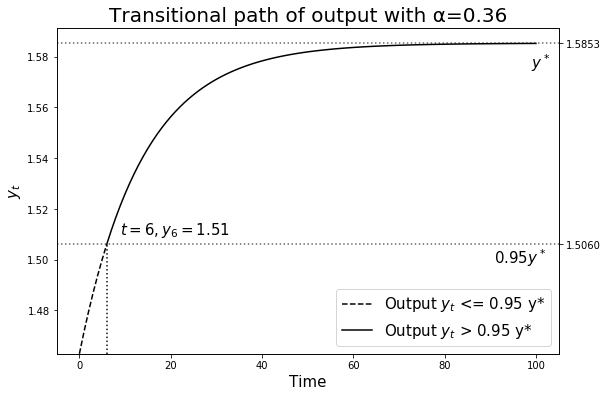

In [12]:
solow = Solow(α=0.36, γ=0.02, η=0.01, δ=0.08, s=0.25)

ax, break_t, y_break, T, y_star = compute_and_plot_solow(solow)
# annotation has to be manually set for each plot
ax.annotate(f"$t={break_t}, y_{break_t}={y_break:.3}$", xy=(break_t+0.5*break_t, y_break+0.0025*y_break), fontsize=15)
ax.annotate(f"$0.95 y^*$", xy=(T-0.1*T, y_break-0.005*y_break), fontsize=15)
ax.annotate(f"$y^*$", xy=(T-0.02*T, y_star-0.01), fontsize=15)
plt.show()

## 4)  $\alpha = 0.75$

steady state capital value: k* = 26.49
steady state output value: y* = 11.68


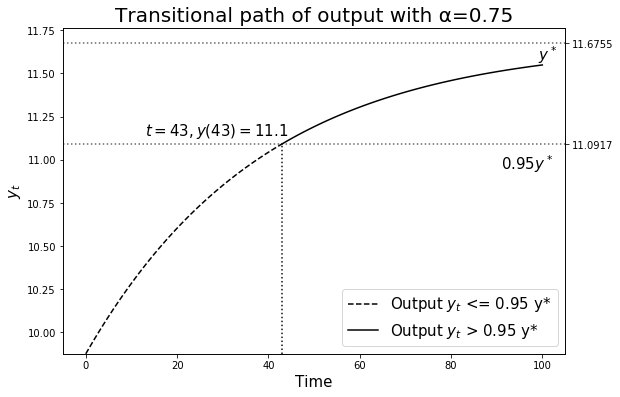

In [4]:
solow = Solow(α=0.75)

ax, break_t, y_break, T, y_star = compute_and_plot_solow(solow)

ax.annotate(f"$t={break_t}, y({break_t})={y_break:.3}$", (break_t-30, y_break+0.05), fontsize=15)
ax.annotate(f"$0.95 y^*$", (T-10, y_break-0.15), fontsize=15)
ax.annotate(f"$y^*$", (T-2, y_star-0.1), fontsize=15)

plt.show()

## 4 continued

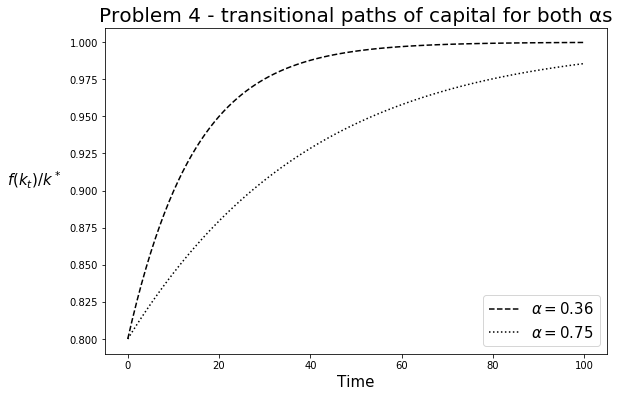

In [9]:
solow1 = Solow(α=0.36)
solow2 = Solow(α=0.75)

T=101

fig, ax = plt.subplots(figsize=(9,6))
lss = ['dashed', 'dotted']

for i, solow in enumerate((solow1, solow2)):
    k_star = solow.steady_state_capital()
    path = solow.generate_capital_path(k_star*0.8, T)
    ax.plot(range(T), path/k_star, label=f"$α={solow.α}$", linestyle=lss[i], color='black')

ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('$f(k_t)/k^*$', fontsize=15, rotation=0, labelpad=35)
ax.legend(loc=4, fontsize=15)
ax.set_title('Problem 4 - transitional paths of capital for both αs', fontsize=20)
plt.show()

## 5) $Y_t/N_t = y^*(1+\eta)^t$

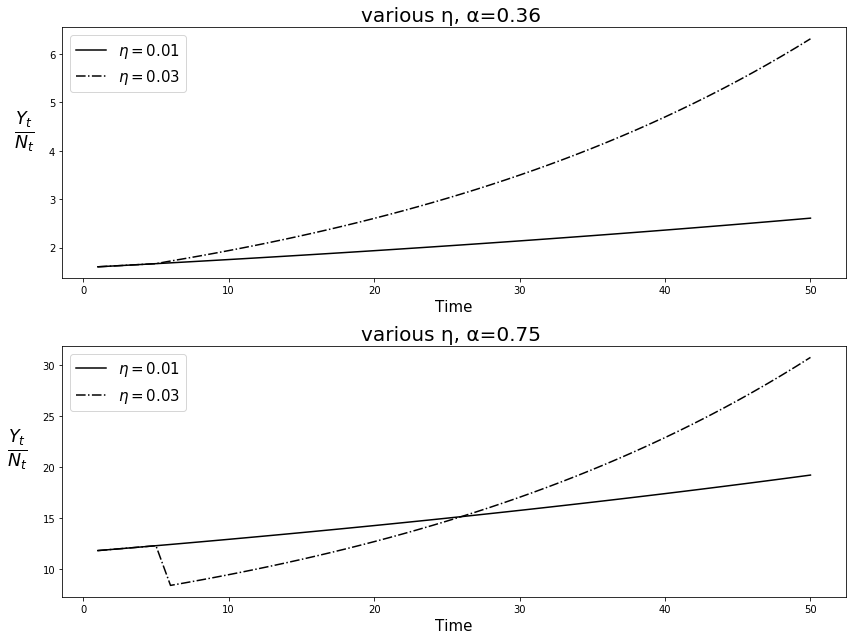

In [6]:
solow1 = Solow(η=0.01)
solow2 = Solow(η=0.03)

time = np.linspace(1,50, 50)

fig = plt.figure(figsize=(12,9))
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0))

alphas_dct={ax1:0.36, ax2:0.75}

for ax, α in alphas_dct.items():
    solow1.α = α
    solow2.α = α

    path1=np.empty(len(time))
    path2=np.empty(len(time))

    for t in time:
        path1[int(t-1)] = solow1.output_per_capita(t)

    for t in time:
        path2[int(t-1)] = solow2.output_per_capita(t)

    path2[:5]=path1[:5]

    ax.plot(time, path1, 'k-', label=f"$η={solow1.η}$")
    ax.plot(time, path2, 'k-.', label=f"$η={solow2.η}$")

    ax.set_xlabel('Time', fontsize=15)
    ax.set_ylabel(r"$\frac{Y_t}{N_t}$", fontsize=25, rotation=0, labelpad=25)
    ax.legend(loc=2, fontsize=15)
    ax.set_title(f"various η, α={solow1.α} ", fontsize=20)
    
plt.tight_layout()
plt.show()

### Marek's mistaken version of 5

steady state output with η=0.01 is 11.7
steady state output with η=0.03 is 1.44


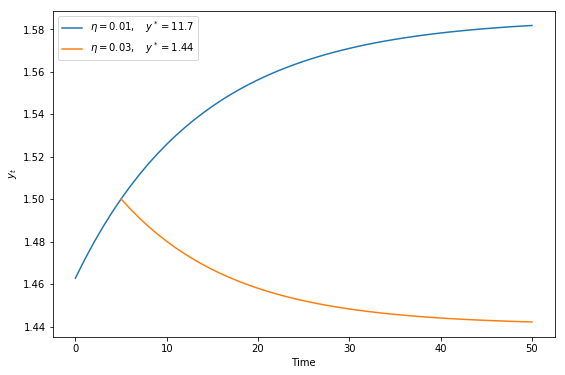

In [7]:
# define the standard output path
solow1 = Solow(α=0.36, γ=0.02, η=0.01, δ=0.08, s=0.25)

T=51
η2 = 0.03

ss_capital_1 = solow1.steady_state_capital()
ss_output_1 = solow.steady_state_output()
k0=ss_capital_1*0.8
print(f"steady state output with η={solow1.η} is {ss_output_1:.3}")

capital_path_1 = solow1.generate_capital_path(k0, T)
output_path_1 = solow1.prod_ftion(capital_path_1)

# set the new parameters starting in period 5
solow2 = Solow(η=η2)
ss_capital_2 = solow2.steady_state_capital()
ss_output_2 = solow2.steady_state_output()
print(f"steady state output with η={solow2.η} is {ss_output_2:.3}")

k0_new = capital_path_1[5]
capital_path_2 = solow2.generate_capital_path(k0_new, T-5)
output_path_2 = solow2.prod_ftion(capital_path_2)

# PLOT IT!!!
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(range(T), output_path_1, label=f"$η={solow1.η}, \quad y^*={ss_output_1:.3}$")
ax.plot(range(5, T), output_path_2, label=f"$η={solow2.η}, \quad y^*={ss_output_2:.3}$")

ax.set(xlabel='Time', ylabel='$y_t$')
ax.legend()
plt.show()

In [8]:
help(np.cumsum)

Help on function cumsum in module numpy.core.fromnumeric:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See `doc.ufuncs`